In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("heart.csv")
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [71]:
X=df.drop('target', axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=103/303, random_state=42)

In [72]:
def ErrorEstimate(X_train_selected,X_test_selected, y_train, y_test):
    model = LogisticRegression(max_iter=3000,penalty = None)
    model.fit(X_train_selected, y_train)
    
    kf= KFold(n_splits=5, shuffle=True)
    cv= cross_val_score(model, X, y, cv=kf)
    print(f'Error From K-Fold Cross-Validation with {k} features::')
    print(1 - np.mean(cv))
    error = 1 - np.mean(cv)
    accuracy = model.score(X_test_selected, y_test)
    print(f"Accuracy: {accuracy}")
    test_error = 1 - accuracy
    return error, test_error

Estimated Error From 5-Fold Cross-Validation with 0 features::
0.17158469945355181
Accuracy with 0 features: 0.8155339805825242
Estimated Error From 5-Fold Cross-Validation with 1 features::
0.171639344262295
Accuracy with 1 features: 0.6990291262135923
Estimated Error From 5-Fold Cross-Validation with 2 features::
0.17491803278688534
Accuracy with 2 features: 0.6990291262135923
Estimated Error From 5-Fold Cross-Validation with 3 features::
0.18513661202185783
Accuracy with 3 features: 0.7184466019417476
Estimated Error From 5-Fold Cross-Validation with 4 features::
0.1750273224043717
Accuracy with 4 features: 0.7281553398058253
Estimated Error From 5-Fold Cross-Validation with 5 features::
0.17158469945355193
Accuracy with 5 features: 0.7572815533980582
Estimated Error From 5-Fold Cross-Validation with 6 features::
0.17486338797814205
Accuracy with 6 features: 0.7864077669902912
Estimated Error From 5-Fold Cross-Validation with 7 features::
0.16169398907103827
Accuracy with 7 features

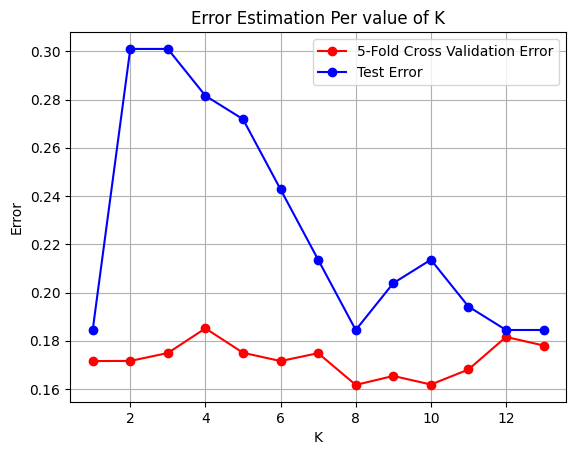

In [95]:
model = LogisticRegression(max_iter=3000, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

coefs = model.coef_[0]
abs_coefs = np.abs(coefs)

cv_errors = []
test_errors = []

for k in range(0,13):
    indices = np.argpartition(abs_coefs, -k)[-k:]
    
    X_train_selected = X_train.iloc[:, indices]
    X_test_selected = X_test.iloc[:, indices]
    
    if k == 2:
        best_columns = X_train.columns[indices].tolist()
    
    cross_error, test_error = ErrorEstimate(X_train_selected, X_test_selected, y_train, y_test)
    cv_errors.append(cross_error)
    test_errors.append(test_error)


features=list(range(1,14))

plt.figure
plt.plot(features, cv_errors, marker='o',linestyle='-', color='r', label='5-Fold Cross Validation Error')
plt.plot(features, test_errors ,marker='o', linestyle='-', color='b', label='Test Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.title('Error Estimation Per value of K')
plt.legend()
plt.grid(True)
plt.show()

['thal', 'ca']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


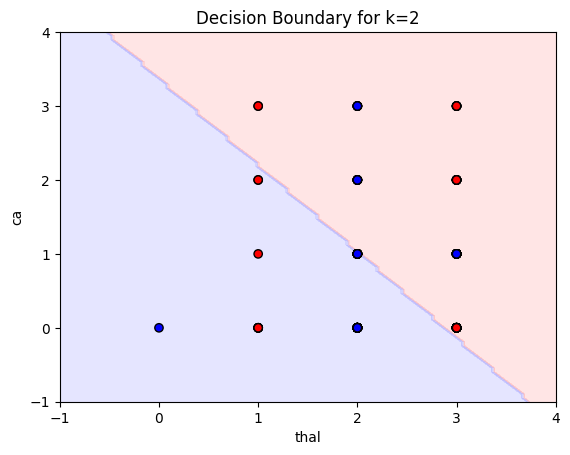

In [98]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, selected_features):
    X_selected = X[selected_features]
    x_min, x_max = X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1
    y_min, y_max = X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel(selected_features[0])
    plt.ylabel(selected_features[1])
    plt.title("Decision Boundary for k=2")
    plt.show()

print(best_columns)
model = LogisticRegression(max_iter=1500, penalty=None)
model.fit(X_train[best_columns], y_train)

plot_decision_boundary(X_train, y_train, model, best_columns)